# Assignment 5

1. Choose a regression dataset (bikeshare is allowed), perform a test/train split, and build a regression model (just like in assingnment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
2. Choose a classification dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Question 1

In [1]:
%matplotlib inline
import math
import traceback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Loading dataset to be used

In [4]:
data = pd.read_csv('/Users/edwardriverarivera/Desktop/validation/ml_validation.csv')

In [5]:
day = pd.read_csv('/Users/edwardriverarivera/Desktop/mlnn/4/day.csv')

In [6]:
saturday = day['5']
saturday = saturday.to_numpy().reshape(-1,1)
saturday

array([[ 89.],
       [ 87.],
       [ 98.],
       [ 99.],
       [ 98.],
       [ 70.],
       [ 58.],
       [ 64.],
       [ 71.],
       [ 66.],
       [ 66.],
       [ 58.],
       [ 61.],
       [ 45.],
       [ 55.],
       [ 49.],
       [ 48.],
       [ 51.],
       [ 39.],
       [ 43.],
       [ 52.],
       [ 43.],
       [ 36.],
       [ 36.],
       [ 43.],
       [ 30.],
       [ 24.],
       [ 25.],
       [ 33.],
       [ 33.],
       [ 21.],
       [ 27.],
       [ 17.],
       [ 16.],
       [ 16.],
       [ 17.],
       [  9.],
       [  6.],
       [ 16.],
       [ 13.],
       [  6.],
       [  7.],
       [  9.],
       [  7.],
       [  3.],
       [  3.],
       [  3.],
       [  3.],
       [  5.],
       [  5.],
       [  2.],
       [  2.],
       [  2.],
       [  6.],
       [  9.],
       [  7.],
       [  9.],
       [  8.],
       [ 18.],
       [ 15.],
       [ 20.],
       [ 14.],
       [ 24.],
       [ 17.],
       [ 41.],
       [ 39.],
       [ 4

In [51]:
hour = np.array(day.index)
x = hour.reshape(-1,1)
y = saturday

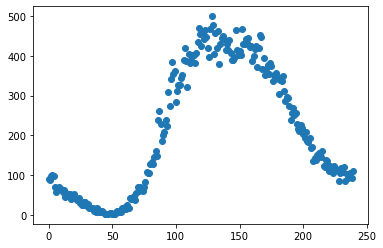

In [52]:
plt.scatter(x,y)

### Original Model

In [9]:
model = LinearRegression() # Original model
model.fit(x, y)

LinearRegression()

In [57]:
model.coef_, model.intercept_

(array([[0.62449319]]), array([98.38934305]))

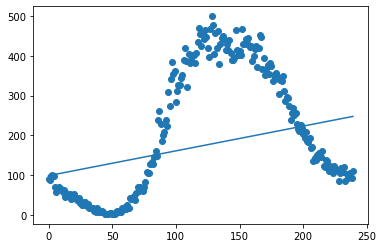

In [58]:
plt.scatter(x,y)
plt.plot(x, np.dot(x, model.coef_) + model.intercept_)

In [59]:
mean_squared_error(y, np.dot(x, model.coef_) + model.intercept_)

23283.511955435875

In [62]:
mean_absolute_error(y, np.dot(x, model.coef_) + model.intercept_)

131.04331461306876

### Splitting Model 

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[1.04643232]]), array([91.03834187]))

In [67]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

(array([[0.98572382]]), array([92.5013355]))

In [68]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

19747.917563573108

In [69]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

22172.73079772431

In [70]:
mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

123.93394063673759

In [71]:
mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

133.68902499978856

### Ridge Model

In [72]:
model = Ridge()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[1.04643045]]), array([91.03856028]))

In [22]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

21479.088606408517

In [73]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

22226.24804561001

In [74]:
mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

124.03171647046828

In [75]:
mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

133.4725259073452

## Question 2

In [90]:
heart = pd.read_csv("heart.csv")

In [91]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
x = heart['age']
x = x.to_numpy().reshape(-1,1)

In [94]:
y = heart['trestbps'] #trestbps is resting blood pressure (in mm Hg on admission to the hospital)
y = y.to_numpy().reshape(-1,1)

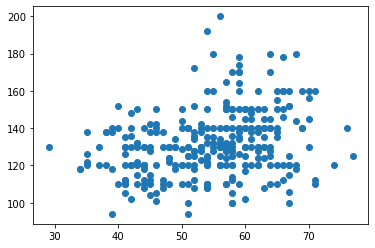

In [95]:
plt.scatter(x,y)

### Splitting Model 

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [103]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([[0.49493517]]), array([104.32730464]))

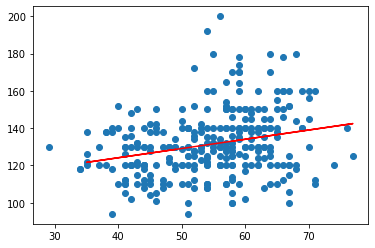

In [104]:
plt.scatter(x,y)
plt.plot(x_train, np.dot(x_train, model.coef_) + model.intercept_, color = 'red')

In [105]:
model = LinearRegression()
model.fit(x_test, y_test)
model.coef_, model.intercept_

(array([[0.58848878]]), array([100.11846285]))

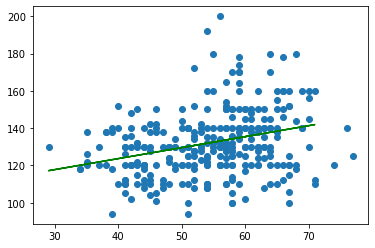

In [106]:
plt.scatter(x,y)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_, color = 'green')

In [107]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

304.1528768028749

In [108]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

262.15370032117943

In [109]:
mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

13.626463204146479

In [110]:
mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

12.354357537170102

In [119]:
beta = np.linalg.lstsq(x, y)[0]


<ipython-input-119-ac437fbd8521>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x, y)[0]


numpy.ndarray

In [121]:
beta = beta.tolist()

In [123]:
beta

[[2.370132332124191]]

In [164]:
pred = np.dot(x, beta)

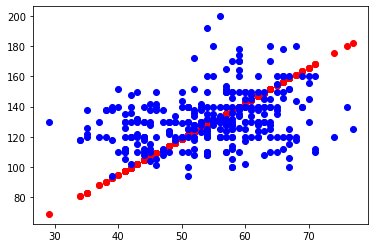

In [134]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

In [177]:
pred = pred.astype(int) # In other to use the confusion matrix, it is important to use INTEGERS
y_pred = pred


In [149]:
y_true = y.T

In [180]:
accuracy_score(y_true, y_pred)

0.009900990099009901

In [179]:
confusion_matrix(y_true, y_pred, normalize= 'true')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
names = heart['trestbps']

In [221]:
code, trestbps = pd.factorize(names) # Need to factorieze IoT have a more concise classification report
trestbps

Int64Index([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
            104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
            152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
            117, 200, 165, 174, 192, 144, 123, 154, 114, 164],
           dtype='int64')

In [224]:
#print(classification_report(y_true, y_pred, labels= trestbps))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

          68       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         0
          82       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         0
          90       0.00      0.00      0.00         0
          92       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         2
          97       0.00      0.00      0.00         0
          99       0.00      0.00      0.00         0
         100       0.00      0.00      0.00         4
         101       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         6
         109       0.00      0.00      0.00         0
         110       0.00    